In [130]:
import serial
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import math

def haversine(lat1, lon1, lat2, lon2):
      R = 6372.8 #km
      dLat = math.radians(lat2 - lat1)
      dLon = math.radians(lon2 - lon1)
      lat1 = math.radians(lat1)
      lat2 = math.radians(lat2)
      a = math.sin(dLat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dLon/2)**2
      c = 2*math.asin(math.sqrt(a))
      return R * c

def bearing(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    Bearing = math.atan2(math.sin(dlon)*math.cos(lat2), 
                         math.cos(lat1)*math.sin(lat2)-math.sin(lat1)*math.cos(lat2)*math.cos(dlon))

    return Bearing


types = [str, # rtcDate - 01/01/2000
         str, # rtcTime - 07:24:04.91
         float, # aX - -48.83
         float, # aY - -328.13
         float, # aZ - 977.54
         float, # gX - 0.25
         float, # gY - 
         float, # gZ - 
         float, # mX - 
         float, # mY - 
         float, # mZ - 
         float, # imu_degC - 
         str, # gps_Date - 
         str, # gps_Time - 
         float, # gps_Lat - 
         float, # gps_Long - 
         float, # gps_alt - 
         float, # gps_SIV - 
         float, # gps_FixType - 
         float, # gps_GroundSpeed - 
         float, # gps_Heading - 
         float, # gps_pDOP - 
         float] # output_Hz - 

In [141]:
pwm_ser = serial.Serial()
pwm_ser_open = False
ola_ser = serial.Serial()
ola_ser_open = False
attempts = 0

while not pwm_ser_open and not ola_ser_open and attempts < 50:
    if not pwm_ser_open:
        try:
            pwm_ser = serial.Serial('com6', 9600, timeout=0.1)
            pwm_ser_open = True
        except:
            print("Failed to open pwm serial port: ", attempts)
        
    if not ola_ser_open:
        try:
            ola_ser = serial.Serial('com8', 115200, timeout=None)
            ola_ser_open = True
        except:
            print("Failed to open pwm serial port: ", attempts)
            
    if not ola_ser_open or not pwm_ser_open:
        time.sleep(0.5)
        attempts += 1

pwm_ser.flushInput()
ola_ser.flushInput()


steers = []
throttles = []
times = []
start = time.time()
log_df = pd.DataFrame(columns=['rtcDate','rtcTime','aX','aY','aZ','gX','gY','gZ','mX','mY','mZ','imu_degC',
                               'gps_Date','gps_Time','gps_Lat','gps_Lon','gps_Alt','gps_SIV','gps_FixType','gps_GroundSpeed','gps_Heading','gps_pDOP','output_Hz',
                               'PWM Steer', 'PWM Throttle', 'Program Wall Time'])

while time.time() - start < 10.0:
    pwm_ser.flushInput()
    pwm_bytes = pwm_ser.readline()
    ola_bytes = ola_ser.readline()
    # print("pwm: ", pwm_bytes)
    # print("ola: ", ola_bytes)
    try:
        decoded_pwm_strings = str(pwm_bytes[0:len(pwm_bytes)-2].decode("utf-8")).split(',')
        decoded_ola_strings = str(ola_bytes[0:len(ola_bytes)-2].decode("utf-8")).split(',')
        # print(decoded_ola_strings)
        if decoded_ola_strings[0] == '01/01/2000':
            [throttle, steer] = [float(ds) for ds in decoded_pwm_strings]            
            if steer > 1000 and steer < 2000 and throttle > 1000 and throttle < 2000:
                out = [ty(st) for st, ty in zip(decoded_ola_strings, types)]
                out.append(throttle)
                out.append(steer)
                out.append(time.time() - start)
                log_df.loc[len(log_df)] = out
            
                times.append(time.time() - start)
                steers.append(steer)
                throttles.append(throttle)
    except:
        print("didn't work")
        continue


pwm_ser.close()
ola_ser.close()

log_df['gps_Lat'] /= 10**7
log_df['gps_Lon'] /= 10**7
log_df['gps_Alt'] /= 10**3


didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn't work
didn

In [156]:
cols = str(['rtcDate,rtcTime,Q9_1,Q9_2,Q9_3,HeadAcc,RawAX,RawAY,RawAZ,RawGX,RawGY,RawGZ,RawMX,RawMY,RawMZ,output_Hz,']).split(',')
stuff = str("01/01/2000,19:31:13.82,0.01077,0.00158,-0.00056,295,-826,6518,-4490,4,4,-11,-25,606,427,50.0,").split(',')
st2 = str("01/01/2000,19:42:44.72,-0.00048,-0.00025,-0.00074,0,256,-308,-8090,-1,6,-9,32767,32767,32767,50.0,").split(',')
st3 = str("01/01/2000,19:44:16.21,0.22447,0.97417,-0.02125,599,-214,-118,-8060,-30,-36,73,958,-40,813,89.922,").split(',')
print("cols:" , cols)

df = pd.DataFrame(columns=cols)
df.loc[0] = stuff
df.loc[1] = st2
df.loc[2] = st3

df

cols: ["['rtcDate", 'rtcTime', 'Q9_1', 'Q9_2', 'Q9_3', 'HeadAcc', 'RawAX', 'RawAY', 'RawAZ', 'RawGX', 'RawGY', 'RawGZ', 'RawMX', 'RawMY', 'RawMZ', 'output_Hz', "']"]


,['rtcDate,rtcTime,Q9_1,Q9_2,Q9_3,HeadAcc,RawAX,RawAY,RawAZ,RawGX,RawGY,RawGZ,RawMX,RawMY,RawMZ,output_Hz,']
0,01/01/2000,19:31:13.82,0.01077,0.00158,-0.00056,295,-826,6518,-4490,4,4,-11,-25,606,427,50.0,
1,01/01/2000,19:42:44.72,-0.00048,-0.00025,-0.00074,0,256,-308,-8090,-1,6,-9,32767,32767,32767,50.0,
2,01/01/2000,19:44:16.21,0.22447,0.97417,-0.02125,599,-214,-118,-8060,-30,-36,73,958,-40,813,89.922,


In [157]:
q1 = float(df['Q9_1'][2])
q2 = float(df['Q9_2'][2])
q3 = float(df['Q9_3'][2])

# Convert the quaternions to Euler angles (roll, pitch, yaw)
# https://en.wikipedia.org/w/index.php?title=Conversion_between_quaternions_and_Euler_angles&section=8#Source_code_2

q0 = math.sqrt( 1.0 - ((q1 * q1) + (q2 * q2) + (q3 * q3)))

q2sqr = q2 * q2

# roll (x-axis rotation)
t0 = +2.0 * (q0 * q1 + q2 * q3)
t1 = +1.0 - 2.0 * (q1 * q1 + q2sqr)
roll = math.atan2(t0, t1) * 180.0 / math.pi

# pitch (y-axis rotation)
t2 = +2.0 * (q0 * q2 - q3 * q1)
t2 = min(t2, 1.0)
t2 = max(t2, -1.0)
pitch = math.asin(t2) * 180.0 / math.pi

# yaw (z-axis rotation)
t3 = +2.0 * (q0 * q3 + q1 * q2)
t4 = +1.0 - 2.0 * (q2sqr + q3 * q3)
yaw = math.atan2(t3, t4) * 180.0 / math.pi

print("rpy: ", math.degrees(roll), ", ", math.degrees(pitch), ", ", math.degrees(yaw))

rpy:  -10195.549481401486 ,  110.831937689995 ,  8828.319972496909


In [ ]:

def quat_to_R(qw, qx, qy, qz):
    R = np.zeros((3,3))
    R[0,0] = qw**2 + qx**2 - qy**2 - qz**2
    R[0,1] = 2*(qx*qy - qw*qz)
    R[0,2] = 2*(qw*qy + qx*qz)
    R[1,0] = 2*(qx*qy + qw*qz)
    R[1,1] = qw**2 - qx**2 + qy**2 - qz**2
    R[1,2] = 2*(qy*qz + qw*qx)
    R[2,0] = 2*(qx*qz - qw*qy)
    R[2,1] = 2*(qw*qx + qy*qz)
    R[2,2] = qw**2 - qx**2 - qy**2 + qz**2
    
    
    
    
    

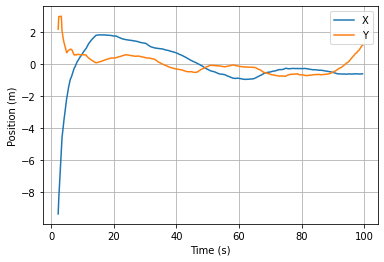

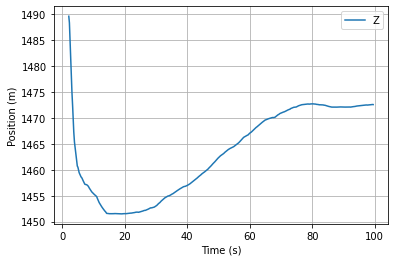

In [137]:
# convert to meters based upon the center point of the course
m_lon = log_df["gps_Lon"].mean()
m_lat = log_df["gps_Lat"].mean()

log_df["dist2center"] = log_df.apply(lambda x: 1000.0 * haversine(x["gps_Lat"], x["gps_Lon"], m_lat, m_lon), axis=1)
log_df["bearing2center"] = log_df.apply(lambda x: bearing(m_lat, m_lon, x["gps_Lat"], x["gps_Lon"]), axis=1)
log_df["x"] = log_df.apply(lambda x: math.sin(x["bearing2center"]) * x["dist2center"], axis=1)
log_df["y"] = log_df.apply(lambda x: math.cos(x["bearing2center"]) * x["dist2center"], axis=1)

plt.plot(log_df['Program Wall Time'], log_df['x'], label='X')
plt.plot(log_df['Program Wall Time'], log_df['y'], label='Y')
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show()

plt.plot(log_df['Program Wall Time'], log_df['gps_Alt'], label='Z')
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show()


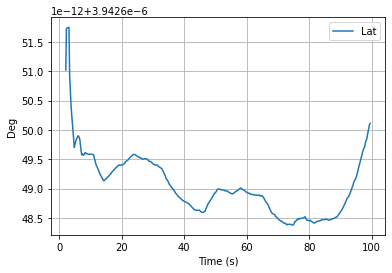

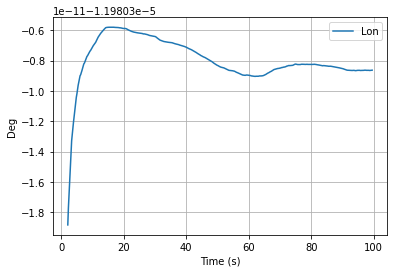

In [138]:
# plt.plot(times, steers, label='steer')
plt.plot(log_df['Program Wall Time'], log_df['gps_Lat']/pow(10,7), label='Lat')
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Deg')
plt.show()

plt.plot(log_df['Program Wall Time'], log_df['gps_Lon']/pow(10,7), label='Lon')
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Deg')
plt.show()

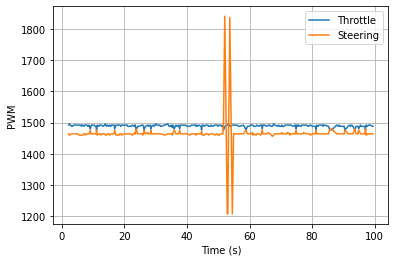

In [139]:
# plt.plot(times, steers, label='steer')
plt.plot(log_df['Program Wall Time'], log_df['PWM Throttle'], label='Throttle')
plt.plot(log_df['Program Wall Time'], log_df['PWM Steer'], label='Steering')
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('PWM')
plt.show()

In [140]:
'''Getting the Range of Steering Values'''
# mean_steer = np.mean(steers)
# std_steer = np.std(steers)
# print("steer norm: ", mean_steer, " and ", std_steer)
#steer max left:  1140.5158707921387  and  3.7511740532592746
#steer norm:  1384.9027713856929  and  3.7655093750631496
#steer max right:  1657.440560841262  and  3.818230691609717
# mean_throttle = np.mean(throttles)
# std_throttle = np.std(throttles)
# print("steer norm: ", mean_throttle, " and ", std_throttle)
# min throttle: 1193.1660363010546  and  3.472886880292434
# norm throttle:  1470.1749989993195  and  3.7404424863637162
# max throttle norm:  1850.375392743501  and  3.763044933666792

steer = np.array([1140.5158707921387, 1384.9027713856929, 1657.440560841262])
throttle = np.array([1193.1660363010546, 1470.1749989993195, 1850.375392743501])

print("steer range: ", steer[2] - steer[0], " upper/lower: ", steer[2] - steer[1], " / ", steer[1] - steer[0])
print("throttle range: ", throttle[2] - throttle[0], " upper/lower: ", throttle[2] - throttle[1], " / ", throttle[1] - throttle[0])


steer range:  516.9246900491232  upper/lower:  272.53778945556905  /  244.38690059355417
throttle range:  657.2093564424463  upper/lower:  380.2003937441814  /  277.0089626982649
